**Business Case: Yulu - Hypothesis Testing**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 25.7MB/s]


In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**Attributes Information of Yulu Dataset**

* datetime: datetime

* season: season (1: spring, 2: summer, 3: fall, 4: winter)

* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

  1: Clear, Few clouds, partly cloudy, partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp: temperature in Celsius

* atemp: feeling temperature in Celsius

* humidity: humidity

* windspeed: wind speed

* casual: count of casual users

* registered: count of registered users

* count: count of total rental bikes including both casual and registered

**1.Define Problem Statement and perform Exploratory Data Analysis.**

**Definition of problem**

*  **The company wants to know Which variables are significant in predicting the demand for shared electric cycles in the Indian market.
  How well those variables describe the electric cycle demands**



**Performing Exploratory Data Analysis.**

*  **Observations on shape of data**

In [ ]:
print(df.shape)

(10886, 12)


*  **Observations on data types of all the attributes**

In [ ]:
print(df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


*  **Conversion of categorical attributes to 'Category'**

In [ ]:
category_column = ['datetime']
df[category_column] = df[category_column].astype('category')
df[category_column]

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00
...,...
10881,2012-12-19 19:00:00
10882,2012-12-19 20:00:00
10883,2012-12-19 21:00:00
10884,2012-12-19 22:00:00


*  **Missing Value Detection**

In [ ]:
missing_value = df.isnull().sum()
print(missing_value)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


*  **Statistical Summary**

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**1.Univariate Analysis (distribution plots of all the continuous variable)**

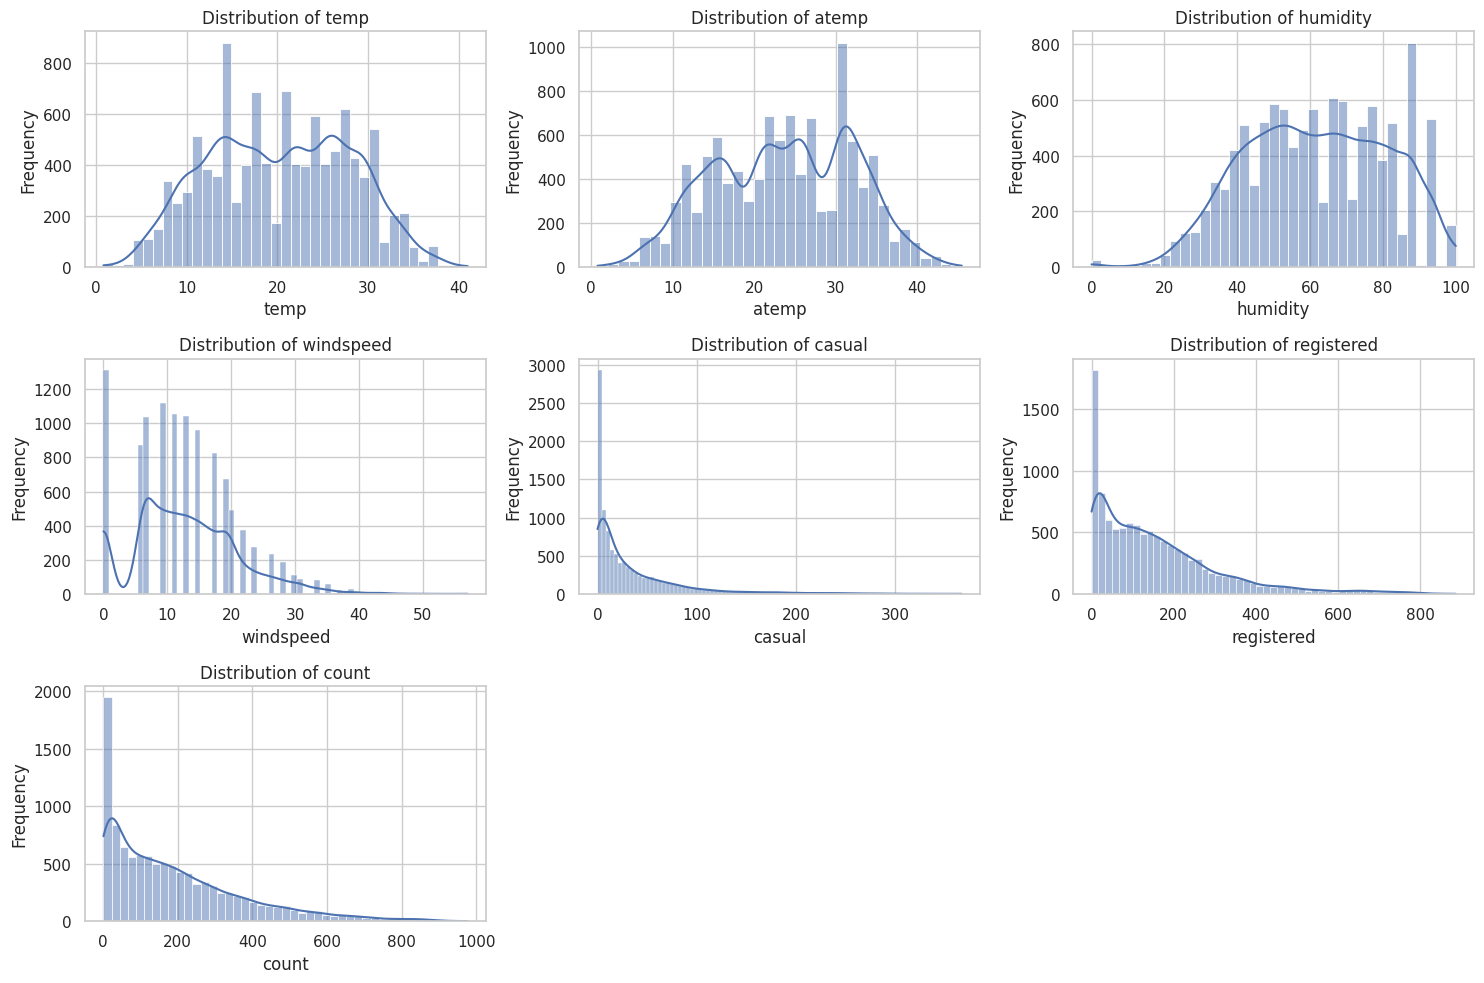

In [ ]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Univariate Analysis barplots/countplots of all the categorical variables**

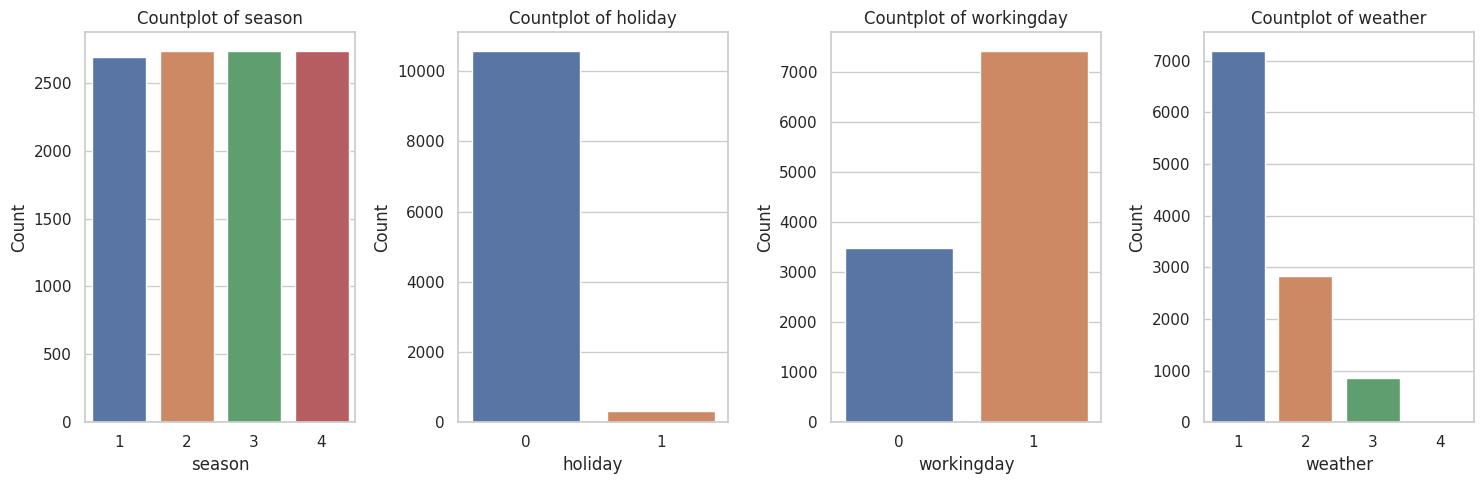

In [ ]:
#countplot
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(15, 5))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 4, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

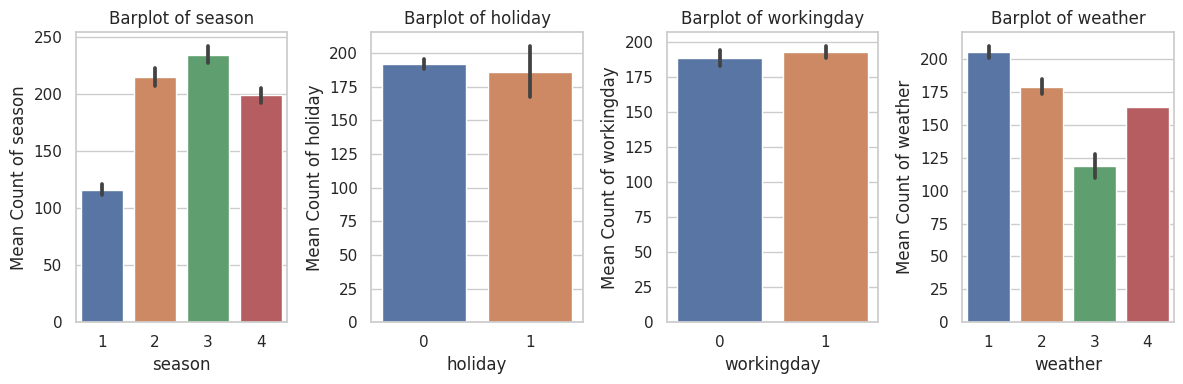

In [ ]:
#barplot
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

plt.figure(figsize=(12, 4))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 4, i)
    sns.barplot(data=df, x=var,y="count")
    plt.title(f'Barplot of {var}')
    plt.xlabel(var)
    plt.ylabel(f'Mean Count of {var}')

plt.tight_layout()
plt.show()

**Bivariate Analysis**

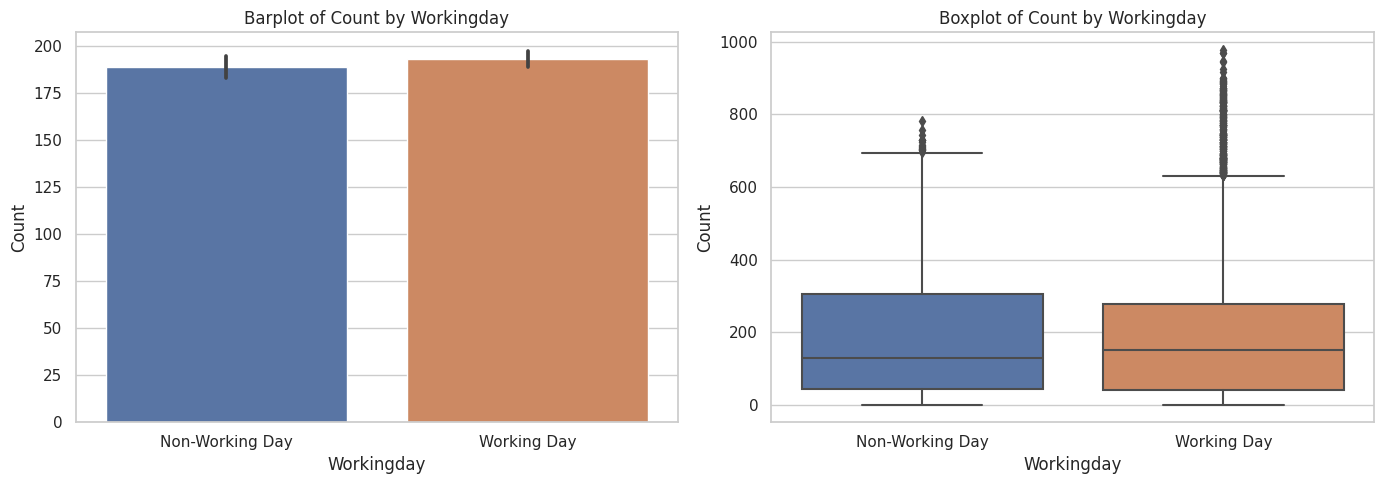

In [ ]:
#Relationships between workday and count
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='workingday', y='count')
plt.title('Barplot of Count by Workingday')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='workingday', y='count')
plt.title('Boxplot of Count by Workingday')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])

plt.tight_layout()
plt.show()

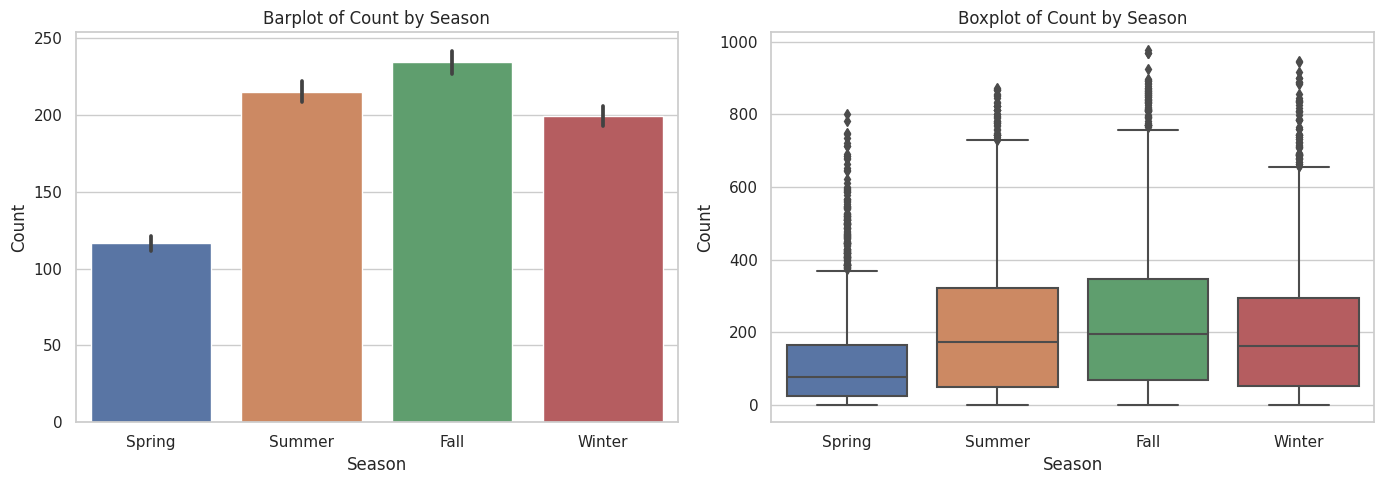

In [ ]:
#Relationships between season and count
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='season', y='count')
plt.title('Barplot of Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='season', y='count')
plt.title('Boxplot of Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])

plt.tight_layout()

plt.show()

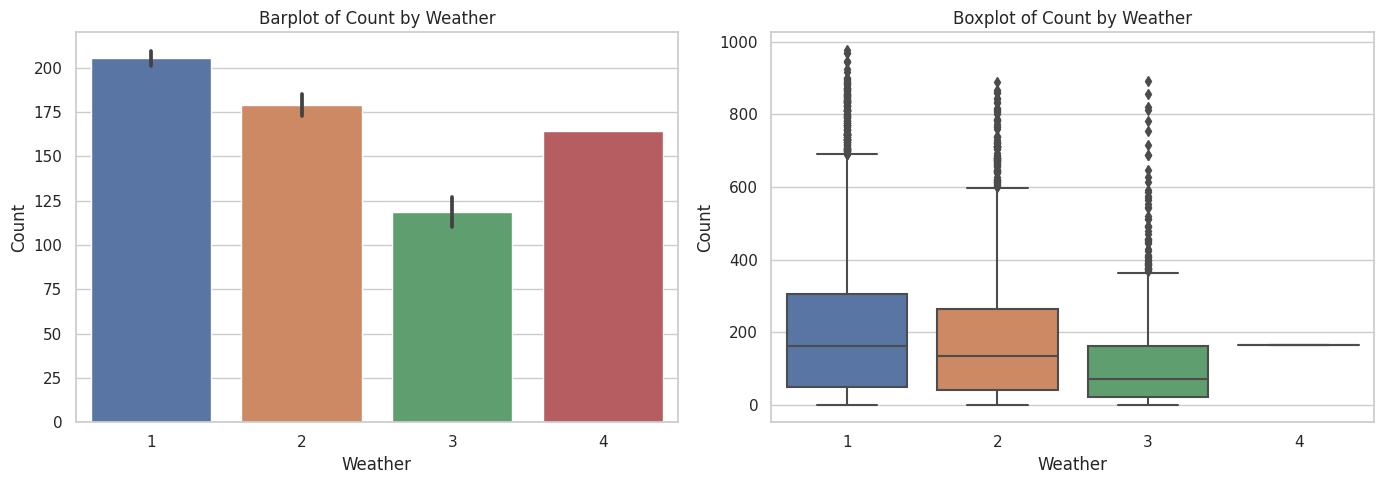

In [ ]:
#Relationships between weather and count
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='weather', y='count')
plt.title('Barplot of Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='weather', y='count')
plt.title('Boxplot of Count by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

**Illustrate the insights based on EDA**

*  **Comments on range of attributes, outliers of various attributes**


In [ ]:
# for datetime attribute
missing_values = df['datetime'].isnull().sum()
print(f"Number of missing values in datetime: {missing_values}")

Number of missing values in datetime: 0


In [ ]:
# for season attribute
unique_season_values = df['season'].unique()
print(f"Unique season values: {unique_season_values}")

season_value_counts = df['season'].value_counts()
print(f"Value counts for each season:\n{season_value_counts}")

Unique season values: [1 2 3 4]
Value counts for each season:
4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


In [ ]:
# for holiday attribute
holiday_counts = df['holiday'].value_counts()
print('The value count for holiday or non holiday:')
print(holiday_counts)

The value count for holiday or non holiday:
0    10575
1      311
Name: holiday, dtype: int64


In [ ]:
# for workingday attribute
workingday_counts = df['workingday'].value_counts()
print("The value count for working day and non working day")
print(workingday_counts)

The value count for working day and non working day
1    7412
0    3474
Name: workingday, dtype: int64


In [ ]:
# for weather attribute
weather_counts = df['weather'].value_counts()
print("The value count for weathers in the dataset:")
print(weather_counts)

The value count for weathers in the dataset:
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


In [ ]:
# for temp and atemp attributes
print("temp summary statistics:")
print(df['temp'].describe())

print("\natemp summary statistics:")
print(df['atemp'].describe())

temp summary statistics:
count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

atemp summary statistics:
count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64


In [ ]:
# for windspeed attribute
mean_windspeed = df['windspeed'].mean()
std_windspeed = df['windspeed'].std()

print(f"Mean Wind Speed: {mean_windspeed}")
print(f"Standard Deviation of Wind Speed: {std_windspeed}")

Mean Wind Speed: 12.7993954069447
Standard Deviation of Wind Speed: 8.164537326838689


In [ ]:
# for casual and registered attributes
casual_min = df['casual'].min()
casual_max = df['casual'].max()

registered_min = df['registered'].min()
registered_max = df['registered'].max()

print("Minimum and Maximum values for 'casual' users:")
print(f"Minimum: {casual_min}")
print(f"Maximum: {casual_max}")

print("\nMinimum and Maximum values for 'registered' users:")
print(f"Minimum: {registered_min}")
print(f"Maximum: {registered_max}")


Minimum and Maximum values for 'casual' users:
Minimum: 0
Maximum: 367

Minimum and Maximum values for 'registered' users:
Minimum: 0
Maximum: 886


In [ ]:
# for count attribute
count = df['count'].describe()
print(count)

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


*  **Comments on range of attributes:**

   *  **There is no missing values in datetime attribute.**
   *  **The Unique season value count for each season is 2734 counts for 4 ,2733 for 2 , 2733 for 3 and 2686 for 1**
   *  **The value count for Holiday is 10575 and for non holiday is 311.**
   *  **The value count for Working day is 7412 and for non working day is 3474**
   *  **The value counts for weather 1: Clear, Few clouds, partly cloudy, partly cloudy is *7192*, for 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist is *2834*, for 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is *859* and for 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is *1***
   *  **For temp attribute the mean value is 20.23086 and the max is 41.00**
   *  **For atmep attribute the mean value is 23.655084 and the max is 45.455**
   *  **The Mean wind speed is around 12.7993 and the Standard Deviation of wind speed is around 8.1645**
   *  **The Maximum casual users are 367 and the maximum registered users is 886**
   *  **The total count of rental bikes including both casual and registered is 10886**


*  **Comments on outliers of various attributes**

In [ ]:
numeric_attributes = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for attribute in numeric_attributes:
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    potential_outliers = df[(df[attribute] < lower_bound) | (df[attribute] > upper_bound)]

    print(f"Summary statistics for '{attribute}':")
    print(f"Number of potential outliers: {len(potential_outliers)}")
    print("")

Summary statistics for 'temp':
Number of potential outliers: 0

Summary statistics for 'atemp':
Number of potential outliers: 0

Summary statistics for 'humidity':
Number of potential outliers: 22

Summary statistics for 'windspeed':
Number of potential outliers: 227

Summary statistics for 'casual':
Number of potential outliers: 749

Summary statistics for 'registered':
Number of potential outliers: 423

Summary statistics for 'count':
Number of potential outliers: 300



*  **Insights for outliers**
   *  **For humidity the number of outliers is 22.**
   *  **For windspeed the number of outliers is 227**
   *  **For casual the number of outliers is 749**
   *  **For registered the number of outliers is 423**
   *  **For count the number of outliers is 300**

**Comments on the distribution of the variables and relationship between them**

*  **Distribution of the variables**

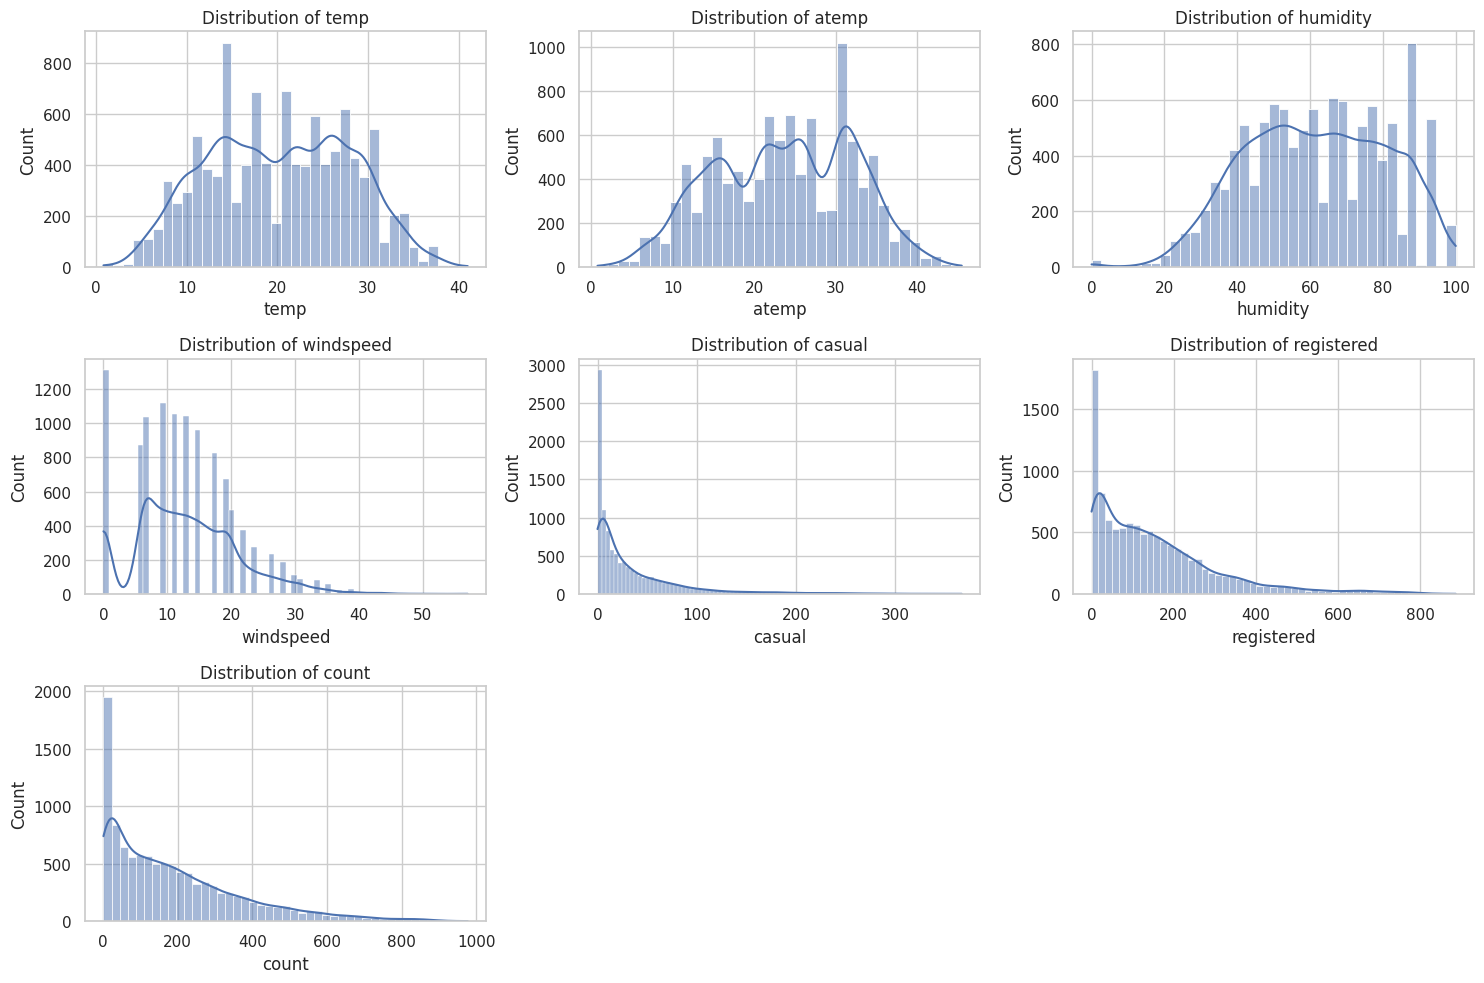

In [ ]:
numeric_attributes = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(15, 10))
for i, attri in enumerate(numeric_attributes, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[attri], kde=True)
    plt.title(f'Distribution of {attri}')
plt.tight_layout()
plt.show()

*  **Comments on relationship between them**

In [ ]:
summary_stats = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].describe()

correlation_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

print("Summary Statistics:")
print(summary_stats)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Summary Statistics:
              temp         atemp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered         count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    28

*  **Insights for Comments on the distribution of the variables and relationship between them**

   *  **The maximum temperature for temp is 41 celsius and minimum is around 0.82**
   *  **The maximum temperature for atemp is around 45.45 celsius and minimum is around 0.76**
   *  **The average humidity is around 61.88**
   *  **The median value of windspeed is around 12.99**
   *  **The count of casual users is 367**
   *  **The count of registered users is 886**
   *  **The count of rental bikes of both casual and registered is 997**

   *  **Humidity has a negative correlation with temperature so humidity increases the temperature tends to decrease.**
   *  **Humidity has a small positive correlation with windspeed so there is a slight increase in windspeed.**
   *  **Windspeed has a weak positive correlation with count so there is a slight increase in bike rentals as windspeed increases.**

**Comments for each univariate and bivariate plots**

   *  **The Unique season value count for each season is 2734 counts for 4 ,2733 for 2 , 2733 for 3 and 2686 for 1.**

   *  **The value count for Holiday is 10575 and for non holiday is 311.**

   *  **The value count for Working day is 7412 and for non working day is 3474.**

   *  **The value counts for weather 1: Clear, Few clouds, partly cloudy, partly cloudy is 7192, for 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist is 2834, for 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds is 859 and for 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog is 1**

   *  **The mean value for season 1 is 116.343261 , the mean value of season 2 is 215.251372, the mean value of season 3 is 234.417124 and the mean value of season 4 is 198.988296**

   *  **The average Holiday is 191.741655 and the average non holiday is 185.877814**

   *  **The average working day is 188.506621 and the average non working day is 193.011873**
   
   *  **The working day has less outliers 49 and the non working day has 251 outliers.**

   *  **The season 3 has more outliers 116  values followed by season 2 with 99 , season 4 with 69 and season 1 has 16 outliers.**
   
   *  **The weather 1 has more outliers compared to other with count of 227 followed by weather 2 (64) and weather 3 (9) and weather 4 has no outliers.**


**2.Hypothesis Testing**

**2-Sample T-Test to check if Working Day has an effect on the number of electric cycles rented**

In [ ]:
workingday_rented = df[df['workingday'] == 1]['count']
non_workingday_rented = df[df['workingday'] == 0]['count']

t_stat, p_value = stats.ttest_ind(workingday_rented, non_workingday_rented)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: Working days has an effect on the number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis: Working days have no effect on the number of electric cycles rented")

t-statistic:  1.2096277376026694
p-value:  0.22644804226361348
Fail to reject the null hypothesis: Working days have no effect on the number of electric cycles rented


*  **ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season**

In [ ]:
season_anova = stats.f_oneway(
    df[df['season'] == 1]['count'],
    df[df['season'] == 2]['count'],
    df[df['season'] == 3]['count'],
    df[df['season'] == 4]['count'])

weather_anova = stats.f_oneway(
    df[df['weather'] == 1]['count'],
    df[df['weather'] == 2]['count'],
    df[df['weather'] == 3]['count'],
    df[df['weather'] == 4]['count'])

print("ANOVA for Season:")
print("F-statistic:", season_anova.statistic)
print("P-value:", season_anova.pvalue)

if season_anova.pvalue < 0.05:
    print("Reject the null hypothesis: There are significant differences in bike rentals based on season.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in bike rentals based on season.")

print("\nANOVA for Weather:")
print("F-statistic:", weather_anova.statistic)
print("P-value:", weather_anova.pvalue)

if weather_anova.pvalue < 0.05:
    print("Reject the null hypothesis: There are significant differences in bike rentals based on weather.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in bike rentals based on weather.")

ANOVA for Season:
F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149
Reject the null hypothesis: There are significant differences in bike rentals based on season.

ANOVA for Weather:
F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Reject the null hypothesis: There are significant differences in bike rentals based on weather.


*  **Chi-square test to check if Weather is dependent on the season**

In [ ]:
contingency_table = pd.crosstab(df['season'], df['weather'])
contingency_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

alpha = 0.05

if p < alpha:
    print("There is a significant dependence between season and weather.")
else:
    print("There is no significant dependence between season and weather.")

Chi-square statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of freedom: 9
Expected frequencies table:
[[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]
There is a significant dependence between season and weather.


**Question - What good looks like**

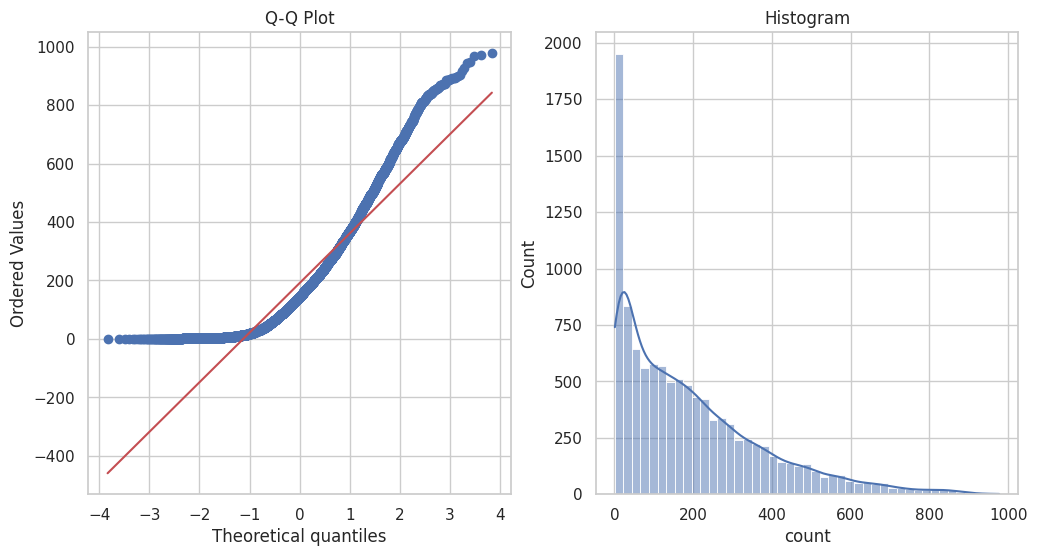

In [ ]:
#Visual analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(df['count'], plot=plt)
plt.title('Q-Q Plot')

plt.subplot(1, 2, 2)
sns.histplot(df['count'], kde=True)
plt.title('Histogram')

plt.show()

In [ ]:
#Hypothesis formulation
alpha = 0.05
if p_value < alpha:
    print(f'Reject null hypothesis (p-value={p_value} < alpha={alpha}).')
else:
    print(f'Fail to reject null hypothesis (p-value={p_value} >= alpha={alpha}).')

Fail to reject null hypothesis (p-value=0.22644804226361348 >= alpha=0.05).


In [ ]:
# Check test assumptions
stat, p_value = stats.shapiro(df['count'])
if p_value < 0.05:
    print(f'Shapiro-Wilk test p-value: {p_value}. Reject null hypothesis of normality.')
else:
    print(f'Shapiro-Wilk test p-value: {p_value}. Fail to reject null hypothesis of normality.')

print("\n")

grouped_data = [df['count'][df['holiday'] == 0], df['count'][df['holiday'] == 1]]
stat, p_value = stats.levene(*grouped_data)
if p_value < 0.05:
    print(f'Levene\'s test p-value: {p_value}. Reject null hypothesis of equal variance.')
else:
    print(f'Levene\'s test p-value: {p_value}. Fail to reject null hypothesis of equal variance.')

Shapiro-Wilk test p-value: 0.0. Reject null hypothesis of normality.


Levene's test p-value: 0.9991178954732041. Fail to reject null hypothesis of equal variance.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
#Find the p-value
import statsmodels.api as sm
predictors = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']

X = sm.add_constant(df[predictors])

y = df['count']

model = sm.OLS(y, X).fit()

summary = model.summary()

p_values = model.pvalues

print("P-values for predictor variables:")
print(p_values)

P-values for predictor variables:
const          3.285166e-54
season         1.189390e-56
holiday        3.231810e-01
workingday     7.287945e-01
weather        2.338874e-02
temp           1.057955e-01
atemp          8.485223e-08
humidity      9.722042e-228
windspeed      1.015238e-04
dtype: float64


In [ ]:
#Conclusion based on the p-value
if p_value < alpha:
    print('There is a statistically significant difference in the mean rental bike count between holidays and non-holidays.')
else:
    print('There is no statistically significant difference in the mean rental bike count between holidays and non-holidays.')

There is no statistically significant difference in the mean rental bike count between holidays and non-holidays.


**Recommendations**

  *  **During the fall season, there was high demand, and there was significant demand during the summer and winter. However, during the springtime, there is very low demand,so the Yulu can reduce its stock to save the expenditure.**

  *  **When windspeed is in the range of 46.0022 to 56.9969 the demand was low. so during that time Yulu can reduce the stocks**

  *  **During holiday times,there were huge bookings—2027668. However during non-holiday times,bookings were low,so the Yulu can consider offering valuable discounts**

  *  **During non-working days,the demand was lower compared to working days. To boost sales,the company can reduce prices and offer festival bonuses, which could lead to a significant increase in Yulu's profits**

  *  **During severe weather conditions such as heavy rain with ice pellets, thunderstorms, snow, and fog (4), the demand was very low, totaling only 164 bookings. To prepare for these situations and save on expenditure in the future, the company should consider appropriate measures**

  *  **During misty conditions with cloudy, broken clouds, few clouds (2) and light snow,as well as light rain with thunderstorms and scattered clouds(3),there was significant growth.To boost up this growth,Yulu can offer discounts or cashback incentives to attract more customers.**